In [3]:
!git clone https://github.com/StanislasBertrand/RetinaFace-tf2.git

Cloning into 'RetinaFace-tf2'...


In [ ]:
# %cd ./RetinaFace-tf2
# !pip install -r requirements.txt
# !pip3 install wget
# !make

In [1]:
%cd ./RetinaFace-tf2

/root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2


In [14]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
from src.retinafacetf2.retinaface import RetinaFace

In [3]:
detector = RetinaFace(False, 0.4)

found weights located at /root/.cache/retinaface/retinafaceweights.npy


2021-12-17 14:35:51.827843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 14:35:51.834731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/anaconda3/envs/team_env/lib/python3.7/site-packages/cv2/../../lib64:
2021-12-17 14:35:51.835645: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-12-17 14:35:51.836963: I tensorflow/core/platform/cpu_feat

In [4]:
import cv2

In [ ]:
from src.retinafacetf2.retinaface import RetinaFace
import cv2
from tqdm import tqdm
import os

detector = RetinaFace(False, 0.4)

base_path = '/root/data/OIDv4_ToolKit/OID/Dataset/'

for tvt in ['train', 'validation', 'test']:
    i = 0
    j = 0
    for label in ['Bicycle helmet', 'Helmet', 'Human head', 'Hat']:

        for txt_path in tqdm(os.listdir(base_path + tvt + '/' + label + '/' + 'Label/')):
            try:
                img_path = base_path + tvt + '/' + label + '/' + txt_path[:-4] + '.jpg'
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                faces, landmarks = detector.detect(img, 0.8)

                if (label == 'Bicycle helmet' ) or (label == 'Helmet'):
                    for idx in range(faces.shape[0]):
                        x ,y , xw, yh = faces[idx][:4]
                        x ,y , xw, yh = faces[idx][:4]
                        w = xw - x
                        h = yh - y
                        x_min = max(0, int(x - 0.5 * w))
                        y_min = max(0, int(y - 0.6 * h))
                        x_max = min(img.shape[1], int(x + 1.5 * w))
                        y_max = min(img.shape[0], int(y + 1.3 * h))

                        face_img = img[y_min:y_max, x_min:x_max]

                        cv2.imwrite(f'/root/data/cut_data/{tvt}/yes/{i}.jpg', face_img)
                        i += 1
                else:
                    for idx in range(faces.shape[0]):
                        x ,y , xw, yh = faces[idx][:4]
                        x ,y , xw, yh = faces[idx][:4]
                        w = xw - x
                        h = yh - y
                        x_min = max(0, int(x - 0.5 * w))
                        y_min = max(0, int(y - 0.6 * h))
                        x_max = min(img.shape[1], int(x + 1.5 * w))
                        y_max = min(img.shape[0], int(y + 1.3 * h))

                        face_img = img[y_min:y_max, x_min:x_max]

                        cv2.imwrite(f'/root/data/cut_data/{tvt}/no/{j}.jpg', face_img)
                        j += 1
            except:
                print(img_path)

ModuleNotFoundError: No module named 'src'

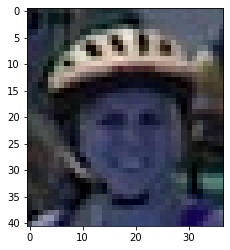

In [19]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/root/data/cut_data/train/yes/1232.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)